In [4]:
## Import necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    
## means all the visualization will show in this notebook itself
import cv2
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [5]:
main_path = '/home/Indranath.Chatterjee/ocr_demo/test_data/'

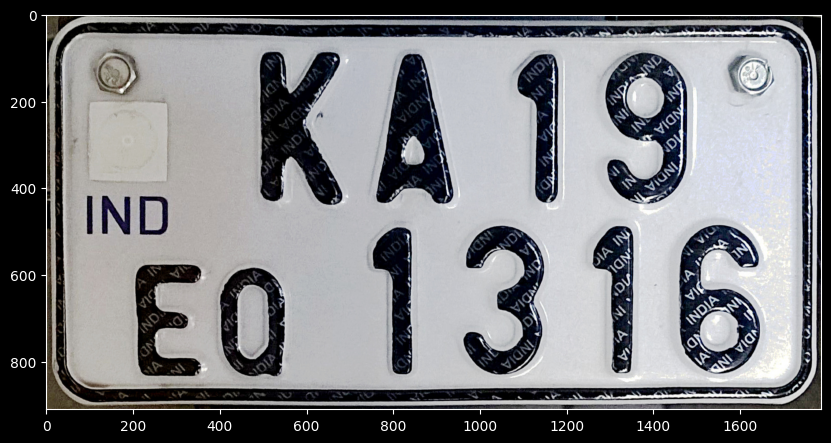

In [8]:
## To read the data using matplotlib
plt.figure(figsize=(10,6))
image = main_path + 'number_plate1.jpg'
img1 = plt.imread(image)
plt.imshow(img1)
plt.show()

In [9]:
type(img1)

numpy.ndarray

In [11]:
img1.ndim

3

In [12]:
img1.shape

(910, 1787, 3)

In [10]:
img1

array([[[76, 69, 50],
        [60, 53, 34],
        [64, 57, 38],
        ...,
        [71, 62, 45],
        [74, 66, 47],
        [77, 69, 50]],

       [[75, 68, 49],
        [64, 57, 38],
        [68, 61, 42],
        ...,
        [78, 66, 50],
        [78, 69, 52],
        [80, 72, 53]],

       [[74, 66, 47],
        [68, 60, 41],
        [71, 64, 45],
        ...,
        [88, 79, 64],
        [89, 80, 63],
        [88, 81, 63]],

       ...,

       [[85, 70, 49],
        [85, 70, 49],
        [85, 70, 49],
        ...,
        [62, 58, 47],
        [56, 52, 41],
        [54, 50, 39]],

       [[87, 72, 51],
        [86, 71, 50],
        [85, 70, 49],
        ...,
        [73, 65, 54],
        [68, 60, 49],
        [67, 59, 48]],

       [[86, 71, 50],
        [85, 70, 49],
        [84, 69, 48],
        ...,
        [74, 62, 50],
        [70, 58, 46],
        [70, 58, 46]]], dtype=uint8)

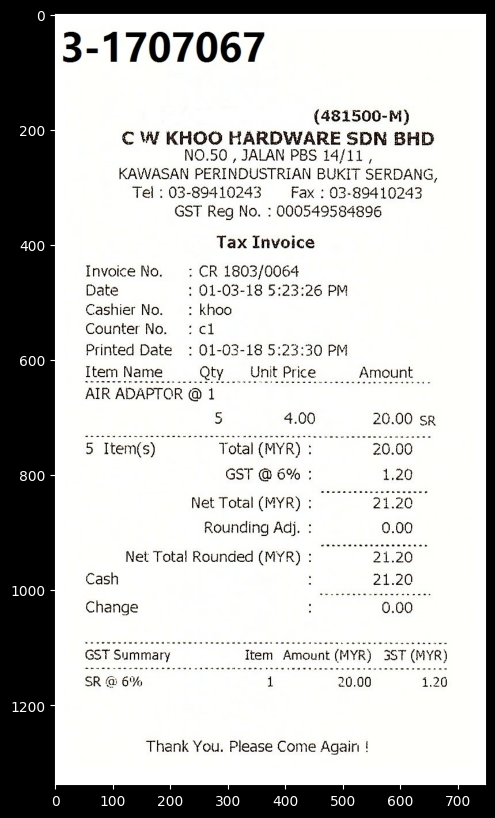

In [20]:
## To read the gray scale image
plt.figure(figsize=(15,10))
bill = main_path + 'image.jpg'
img2 = plt.imread(bill)
plt.imshow(img2, cmap='gray')
plt.show()

In [21]:
img2.shape, img2.size, type(img2), img2.ndim

((1338, 748, 3), 3002472, numpy.ndarray, 3)

In [22]:
img2.dtype, img2.nbytes

(dtype('uint8'), 3002472)

In [23]:
img2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Image Statistics

In [25]:
%%time
np.mean(img2), np.average(img2), np.median(img2), np.std(img2), np.var(img2)

CPU times: user 28.5 ms, sys: 2.04 ms, total: 30.6 ms
Wall time: 29.7 ms


(241.28896356069265,
 241.28896356069265,
 255.0,
 51.43793397306058,
 2645.86105141694)

## Image Mask
- We have to create binary array to apply masking

In [41]:
## Creating Binary array 
a = [3,2,3]    
## Creating 3D array contain 3 row, 2 columns and 3 blocks of same kind
np.zeros(a)

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [42]:
## We can also do it in this way
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [46]:
np.zeros_like((4,5)) ## it will print the array by its shape

array([0, 0])

In [47]:
b = [4,5]
print(np.zeros(b))
print(np.zeros_like(b))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[0 0]


In [45]:
## We can also do it in this way
print(a)
np.zeros_like(a)

[3, 2, 3]


array([0, 0, 0])

Image masking using Numpy array

In [55]:
## Use of mgrid
x, y = np.mgrid[0:3:0.2, 5:6:0.1]
print(x)
print(y)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2]
 [1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4]
 [1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6]
 [1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8]
 [2.  2.  2.  2.  2.  2.  2.  2.  2.  2. ]
 [2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2]
 [2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.4]
 [2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6]
 [2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8]]
[[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [5.  5.1 

In [56]:
## Use of ogrid - only one dimension of each returned array is greater than 1
x, y = np.ogrid[0:13:0.5, 5:15:2.5]
print(x)
print(y)
print(x.shape)
print(y.shape)

[[ 0. ]
 [ 0.5]
 [ 1. ]
 [ 1.5]
 [ 2. ]
 [ 2.5]
 [ 3. ]
 [ 3.5]
 [ 4. ]
 [ 4.5]
 [ 5. ]
 [ 5.5]
 [ 6. ]
 [ 6.5]
 [ 7. ]
 [ 7.5]
 [ 8. ]
 [ 8.5]
 [ 9. ]
 [ 9.5]
 [10. ]
 [10.5]
 [11. ]
 [11.5]
 [12. ]
 [12.5]]
[[ 5.   7.5 10.  12.5]]
(26, 1)
(1, 4)


In [57]:
x, y = np.ogrid[0:13, 5:15]
print(x)
print(y)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
[[ 5  6  7  8  9 10 11 12 13 14]]


In [58]:
x, y = np.ogrid[:13, :15]
print(x)
print(y)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]]


In [96]:
## Replace True by 0
a = np.random.randint((4,5))
print(a)
b = [True, False]
a[b] = [0]
a

[1 0]


array([0, 0])

(910, 1787, 3)
455.0 893.5
***************************************
[[76 69 50]
 [60 53 34]
 [64 57 38]
 ...
 [74 62 50]
 [70 58 46]
 [70 58 46]]


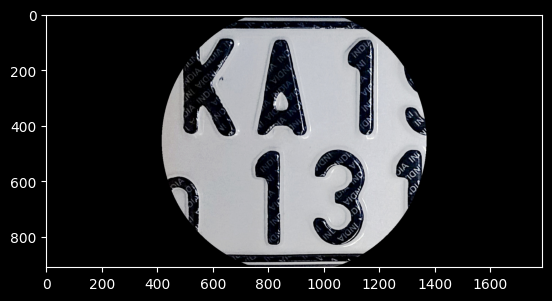

In [111]:
print(img1.shape)

nrows, ncols, channels = img1.shape   ## nrows = 910, ncols = 1787, channles = 3
row, col = np.ogrid[:nrows, :ncols]    ## row and col are the 2D array or column and row matrix
# print(row,col)
cnt_row, cnt_col = nrows/2, ncols/2     ## to find the centre
print(cnt_row, cnt_col)

## Using distance formula identify masking
outer_mask = ((row-cnt_row)**2 + (col-cnt_col)**2 > cnt_row*500)
# print(outer_mask)     ## will show the boolean value matrix i.e True and False
img_copy = img1.copy()
# print(img_copy)
print('***************************************')
print(img_copy[outer_mask])
img_copy == img_copy[outer_mask]
img_copy[outer_mask] = [0,0,0]  # or put 0   ## whatever present outer this mask set them by 0 i.e Black
# print(img_copy)
plt.imshow(img_copy)
plt.show()


## Image Channel

In [112]:
## Selecting specific channel
r = img1[:, :, 0]   ## select Red Channel
g = img1[:, :, 1]    ## select Green channel
b = img1[:, :, 2]    ## select Blue channel

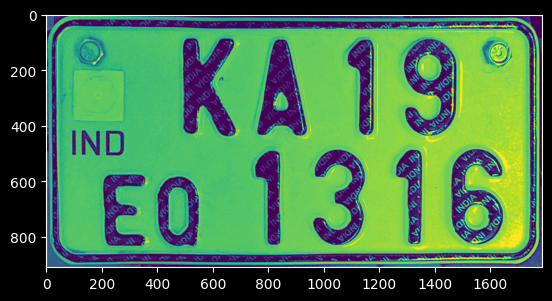

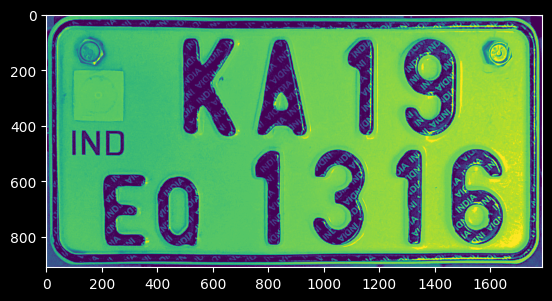

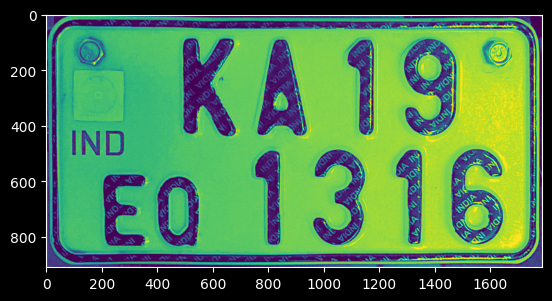

In [137]:
plt.imshow(r)
plt.show()
plt.imshow(g)
plt.show()
plt.imshow(b)
plt.show()

In [113]:
type(r), type(g), type(b)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [114]:
r.shape, g.shape, b.shape

((910, 1787), (910, 1787), (910, 1787))

In [115]:
r.ndim, g.ndim, b.ndim

(2, 2, 2)

In [116]:
output = [img1, r, g, b]
titles = ['Raw_Image', 'Red', 'Green', 'Blue']

In [120]:
img1[0] == r

False

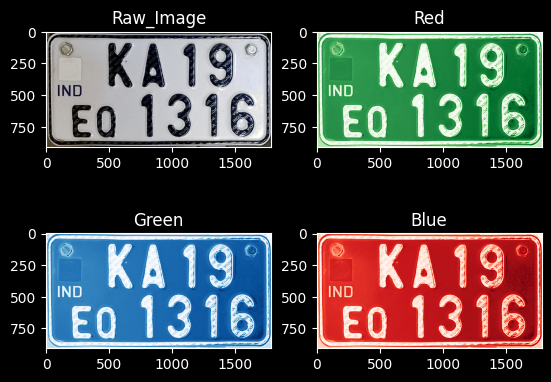

In [149]:
color = ['Gray', 'Greens', 'Blues', 'Reds']
for i in range(4):
    plt.subplot(2,2, i+1)
    plt.title(titles[i])
    if i == 0:
        plt.imshow(output[0])    ## showing original image
    else:
        plt.imshow(output[i], cmap=color[i])

plt.show()


In [161]:
# # create a binary mask with the same size as the image
# mask = np.zeros_like(img1)

# # set some pixels in the mask to 1 (white) to reveal those pixels in the image
# mask[100:300, 200:400] = 1

# # apply the mask to the image using a bitwise AND operation
# masked_img = cv2.bitwise_and(img1, mask)

# # display the original image and the masked image side by side
# cv2.imshow("Original Image", img1)
# cv2.imshow("Masked Image", masked_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Arithmetic Operations

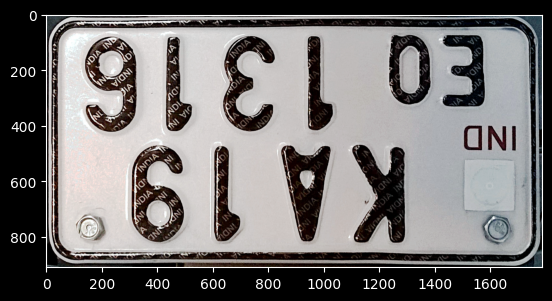

In [164]:
## Flipping the image
plt.imshow(np.flip(img1)) 
plt.show()

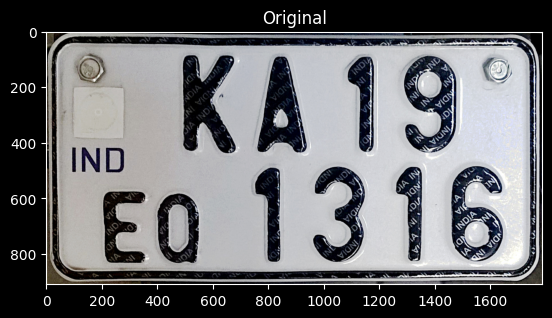

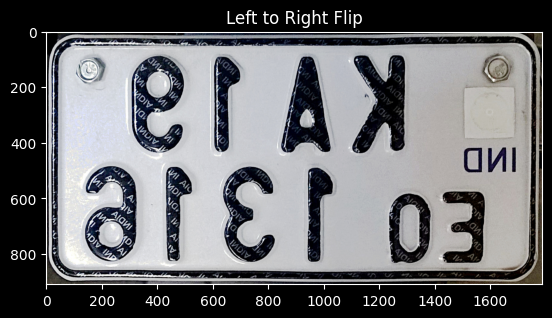

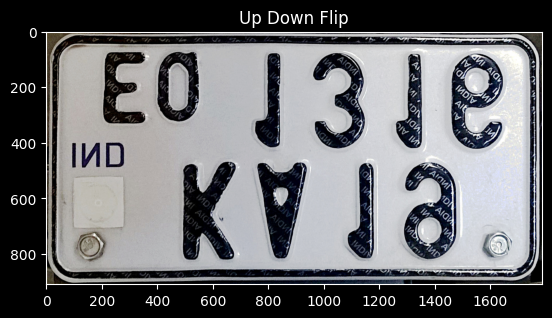

In [167]:
## Flipping the image
plt.imshow(img1) ## flip left tor right
plt.title('Original')
plt.show()
plt.imshow(np.fliplr(img1)) ## flip left tor right
plt.title('Left to Right Flip')
plt.show()
## Flipping the image
plt.imshow(np.flipud(img1))      ## flip updown 
plt.title('Up Down Flip')
plt.show()

##### Rolling Image
- The numpy.roll() function rolls array elements along the specified axis. Basically what happens is that elements of the input array are being shifted. If an element is being rolled first to the last position, it is rolled back to the first position. 

##### Syntax
numpy.roll(array, shift, axis = None)


##### Link:
- https://www.geeksforgeeks.org/numpy-roll-python/

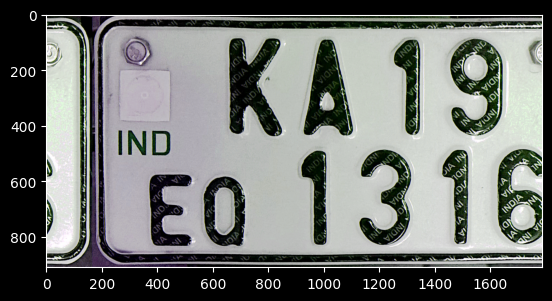

In [173]:
plt.imshow(np.roll(img1, 500))
plt.show()

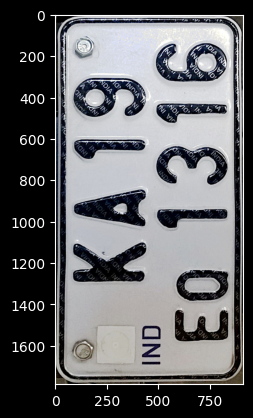

In [176]:
## Rotate image 90 deg
plt.imshow(np.rot90(img1))    ## Rotate 90 degree
plt.show()

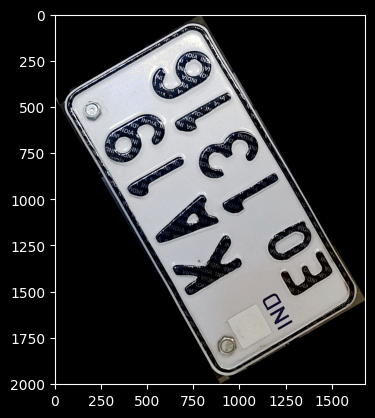

In [181]:
## Rotate image at any angle using Scipy
from scipy.ndimage.interpolation import rotate
plt.imshow(rotate(img1, angle = 120))
plt.show()

Notes: 
https://medium.com/@bosssds65/how-to-rotate-image-using-only-numpy-in-15-lines-ddc1fca93c87

In [ ]:
## Rotating image using Numpy
